In [44]:
import pandas as pd
import numpy as np
#import seaborn as sns
import sqlite3
import  matplotlib.pyplot as plt
#sns.set()

In [3]:
df = pd.read_csv("titanic.csv")

In [4]:
df.shape

(891, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


## Data Description

- Survival : 0 = No, 1 = Yes
- pclass(Ticket Class) : 1 = 1st, 2 = 2nd, 3 = 3rd
- Sex(Gender) : Male, Female
- Age : Age in years
- SibSp : Number of siblings/spouses abroad the titanic
- Parch : Number of parents/children abrod the titanic
- Ticket : Ticket Number
- Fare : Passenger fare
- Cabin : Cabin Number
- Embarked : Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

# Q1: Print first and last rows from the dataset

In [8]:
top = df.head(1)
bottom = df.tail(1)
concatenated = pd.concat([top,bottom])

print(concatenated)

     survived  pclass   sex   age  sibsp  parch  fare embarked  class  who  \
0           0       3  male  22.0      1      0  7.25        S  Third  man   
890         0       3  male  32.0      0      0  7.75        Q  Third  man   

     adult_male deck  embark_town alive  alone  
0          True  NaN  Southampton    no  False  
890        True  NaN   Queenstown    no   True  


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


# Q2: Select only survived people

In [11]:
df.loc[:,"survived"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

# Q3: Select sex, fare, survived columns

In [18]:
df.loc[:,["survived","sex" ,"fare"]]


,survived,sex,fare
0,0,male,7.2500
1,1,female,71.2833
2,1,female,7.9250
3,1,female,53.1000
4,0,male,8.0500
...,...,...,...
886,0,male,13.0000
887,1,female,30.0000
888,0,female,23.4500
889,1,male,30.0000


# Q4: Add a new_column to a DataFrame that combines class and embark_town

In [39]:
df["new_column"] = df["class"] + df ["embark_town"]
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_column
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,ThirdSouthampton
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,FirstCherbourg
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,ThirdSouthampton
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,FirstSouthampton
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,ThirdSouthampton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,SecondSouthampton
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,FirstSouthampton
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,ThirdSouthampton
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,FirstCherbourg


# Q5: Remove new_column from the DataFrame

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Q6: Filter DataFrame for rows of survived Males only 

In [35]:
df2 = df.query("sex == 'male'")
#print(df2)
df2.loc[:,"survived"]


0      0
4      0
5      0
6      0
7      0
      ..
883    0
884    0
886    0
889    1
890    0
Name: survived, Length: 577, dtype: int64

,age,class
17,NaN,Second
21,34.0,Second
23,28.0,First
36,NaN,Third
55,NaN,First
...,...,...
838,32.0,Third
839,NaN,First
857,51.0,First
869,4.0,Third


# Q7: The total number of males who survived 

In [36]:
df2.count()

survived       577
pclass         577
sex            577
age            453
sibsp          577
parch          577
fare           577
embarked       577
class          577
who            577
adult_male     577
deck           106
embark_town    577
alive          577
alone          577
dtype: int64

# Q8: How many values in each class?

In [71]:

df.value_counts('class')


class
Third     491
First     216
Second    184
dtype: int64

# Import Seaborn

In [ ]:
import seaborn as sns
sns.set()

# Q9: Draw barplot represents survived people based on sex

<AxesSubplot:xlabel='sex', ylabel='survived'>

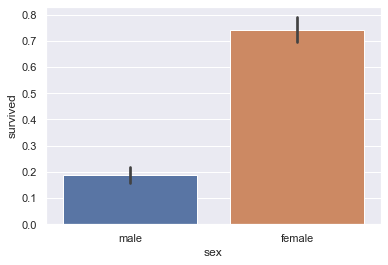

In [41]:
sns.barplot(x='sex', y='survived',data=df) 


# Q10: Draw catplot represents survived people based on embarked

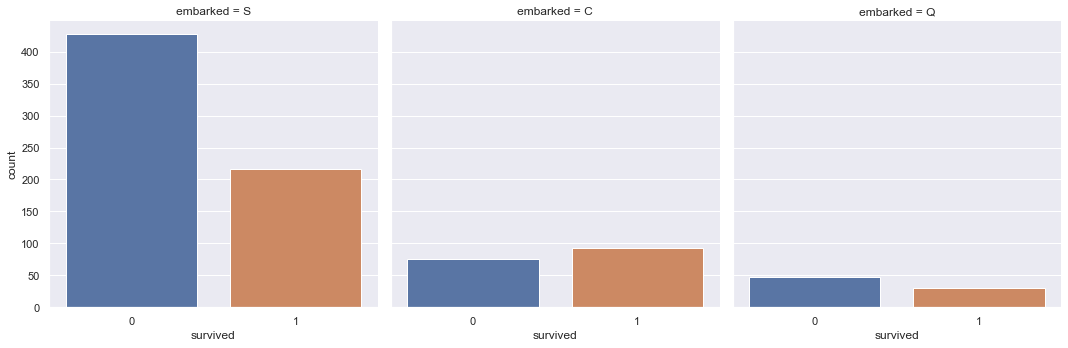

In [43]:
sns.catplot(x='survived', col='embarked', kind = "count",data=df )

# Q11: Draw boxplot represents distribution of male and female based on age and pclass

Text(0.5, 1.0, 'boxplot')

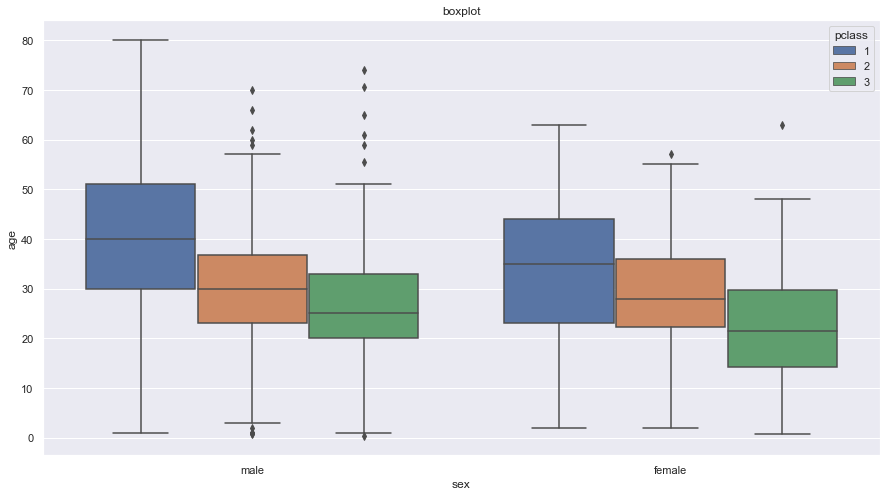

In [46]:
plt.figure(figsize=(15,8))

sns.boxplot(
    x="sex", 
    y="age",
    hue="pclass",
    data=df)

plt.title("boxplot")

# Q12: Draw heatmap represents correlations between sibsp, parch, age, fare, and survived columns

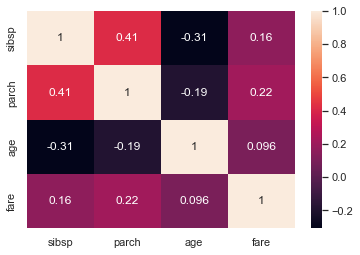

In [65]:
df3 = df.loc[:,["sibsp","parch" ,"age","fare"]]
sns.heatmap(df3.corr() , annot = True)
plt.show()

# Q13: Draw factorplot represents the relation between sibsp and survived columns

/Users/leena/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


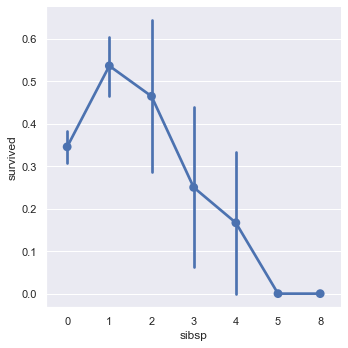

In [66]:

sns.factorplot(x ='sibsp', y ='survived', data = df)

# Q14: Draw extra insights [Optional]